# Exploring Political Contributions in British Columbia

To run a cell, select it and ctrl-enter.

In [69]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

contributions = pd.read_csv('SA1Full2.txt', sep='\t', header=3)
contributions['DATE'] = pd.to_datetime(contributions['DATE'])

## Private Dinners, Cash for Access Events

When do cash for access events happen, and who was attending them?

Cash for access events (exclusive dinners with the premier, golf tournaments) reportedly have fixed ticket prices, like \$5000 or \$10000.  We can use this fact to search for dates that have many (default >5) donations of one of these magnitudes.  Alter the parameters below to investigate.

In [75]:
#PARAMETERS

## Finding when private dinners happened for the BC Liberals
def find_fundraiser(amount, frequency, party, start_date):    
    event_donations = contributions[contributions['AMOUNT'] == amount][contributions['FILER_NAME'] == party].sort_values(by="DATE")

    no_by_date = event_donations.groupby('DATE').size()
    dinner_dates = no_by_date[no_by_date >= 5]
    dates = dinner_dates[dinner_dates.index > start_date].index
    possible_diners = event_donations[event_donations["DATE"].isin(dates)]

    print_full(possible_diners[["CONTRIBUTOR_NAME", "DATE", "AMOUNT", "CLASS"]])

print("POSSIBLE BC LIBERAL EVENTS 2016 $10000 tickets")
find_fundraiser(10000, 5, 'BC LIBERAL PARTY', "2016-01-01")
print("========================================")
print("POSSIBLE BC LIBERAL EVENTS 2016 $5000 tickets")
find_fundraiser(5000, 5, 'BC LIBERAL PARTY', "2016-01-01")

POSSIBLE BC LIBERAL EVENTS 2016 $10000 tickets
                              CONTRIBUTOR_NAME       DATE   AMOUNT  CLASS
254033                    LAPCORP HOLDINGS LTD 2016-03-31  10000.0      2
406378                      TECK RESOURCES LTD 2016-03-31  10000.0      2
339405                     PETER R B ARMSTRONG 2016-03-31  10000.0      1
341030                        PHILIP HOCHSTEIN 2016-03-31  10000.0      1
133536                       ERNST & YOUNG LLP 2016-03-31  10000.0      3
376759                             RYAN BEEDIE 2016-03-31  10000.0      1
317087       NEW CAR DEALERS ASSOCIATION OF BC 2016-03-31  10000.0      6
261201                            LIFELABS INC 2016-03-31  10000.0      2
284989                           MARINA HADDAD 2016-04-01  10000.0      1
343554                   PRETIUM RESOURCES INC 2016-04-01  10000.0      2
22820             AQUILINI INVESTMENT GROUP LP 2016-04-01  10000.0      3
377964            SAKUNA NATURAL RESOURCES INC 2016-04-01  10000.

/media/rydertana/4b16cf63-5c01-4664-9954-fbb9dbaba9d1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



                                         CONTRIBUTOR_NAME       DATE  AMOUNT  \
223602                                           JOHN LES 2016-01-22  5000.0   
258323                       LEGACY PACIFIC LAND CORP INC 2016-01-22  5000.0   
385812                                 SHATO HOLDINGS LTD 2016-01-22  5000.0   
395247                        STARLINE WINDOWS (2001) LTD 2016-01-22  5000.0   
317080                  NEW CAR DEALERS ASSOCIATION OF BC 2016-01-22  5000.0   
163927                             GUILDFORD CAPITAL CORP 2016-02-12  5000.0   
317083                  NEW CAR DEALERS ASSOCIATION OF BC 2016-02-12  5000.0   
146932              GATEWAY CASINOS AND ENTERTAINMENT LTD 2016-02-12  5000.0   
254126                               LARK ENTERPRISES LTD 2016-02-12  5000.0   
98907                               DAYHU INVESTMENTS LTD 2016-02-12  5000.0   
297699                                    MCL MOTORS 2010 2016-02-12  5000.0   
67443                        CENTURY GRO

## Contributions grouped by class

In [76]:


contributions = contributions[contributions['AMOUNT'] > 0]

number_by_date = contributions[['DATE', 'AMOUNT']].groupby('DATE').size().to_frame('SIZE')
amount_by_date = contributions[['DATE', 'AMOUNT']].groupby('DATE').sum()

number_by_date_class_1 = contributions[['DATE', 'AMOUNT', 'CLASS']][contributions['CLASS'] == 1].groupby('DATE').size()
number_by_date_class_2 = contributions[['DATE', 'AMOUNT', 'CLASS']][contributions['CLASS'] == 2].groupby('DATE').size()
number_by_date_class_3 = contributions[['DATE', 'AMOUNT', 'CLASS']][contributions['CLASS'] == 3].groupby('DATE').size()
number_by_date_class_4 = contributions[['DATE', 'AMOUNT', 'CLASS']][contributions['CLASS'] == 4].groupby('DATE').size()
#
# print(len(contributions))
# contributions.iloc[6453:6536]
# contributions_deduped = contributions.groupby(['CONTRIBUTOR_NAME', 'DATE', 'AMOUNT'], as_index=False).sum()


# TOP 1%

In [25]:
mask_2016 = contributions['DATE'].map(lambda x: x.year) == 2016
contributions_2016 = contributions[mask_2016]
print("In 2016 there were {} contributions".format(len(contributions_2016)))
unique_contributors = contributions_deduped[mask_2016].groupby(['CONTRIBUTOR_NAME', 'CLASS'], as_index=False).sum()
print("There are {} unique contributors".format(len(unique_contributors)))

number_top_1_perc = len(unique_contributors)/100
top_1_perc = unique_contributors.nlargest(number_top_1_perc, 'AMOUNT')
print("Top 1% of contributors donated {}", top_1_perc["AMOUNT"].sum())
top_1_perc

In 2016 there were 45510 contributions
There are 9519 unique contributors
('Top 1% of contributors donated {}', 7316211.4399999995)


/media/rydertana/4b16cf63-5c01-4664-9954-fbb9dbaba9d1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,CONTRIBUTOR_NAME,CLASS,AMOUNT,BOUNDARY_SET,SA1_CONTRIBUTION_SK,Unnamed: 12
7153,PETER REDEKOP,1,365500.00,2008.0,6330392,NaN
2886,FINNING LTD,2,290070.00,NaN,5477717,NaN
9321,WEST FRASER MILLS LTD,2,267284.00,6024.0,16930435,NaN
8764,TECK RESOURCES LTD,2,229775.00,NaN,8197849,NaN
2788,ESTATE OF JOHN CHAMBERLIN,1,229761.80,NaN,361787,NaN
8134,SAUDER INDUSTRIES LTD,2,223500.00,NaN,3407813,NaN
783,BC GOVERNMENT & SERVICE EMPLOYEES' UNION,4,205858.97,34136.0,37985955,NaN
7989,RPMG HOLDINGS LTD,2,182500.00,2008.0,9768441,NaN
7845,ROGERS GROUP OF COMPANIES INC,2,161200.00,NaN,8287291,NaN
7486,RENNIE MARKETING SYSTEMS LTD,2,158100.00,NaN,10274774,NaN


## Exploring patterns in frequency of donations

In [22]:
from matplotlib import pyplot as plt

<class 'pandas.core.frame.DataFrame'>


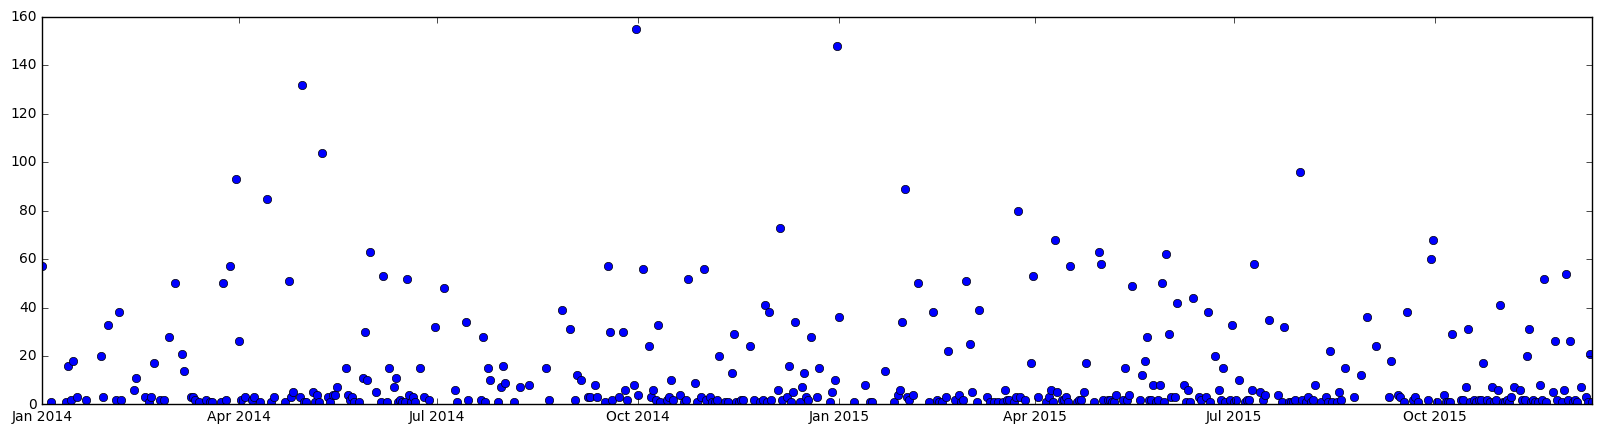

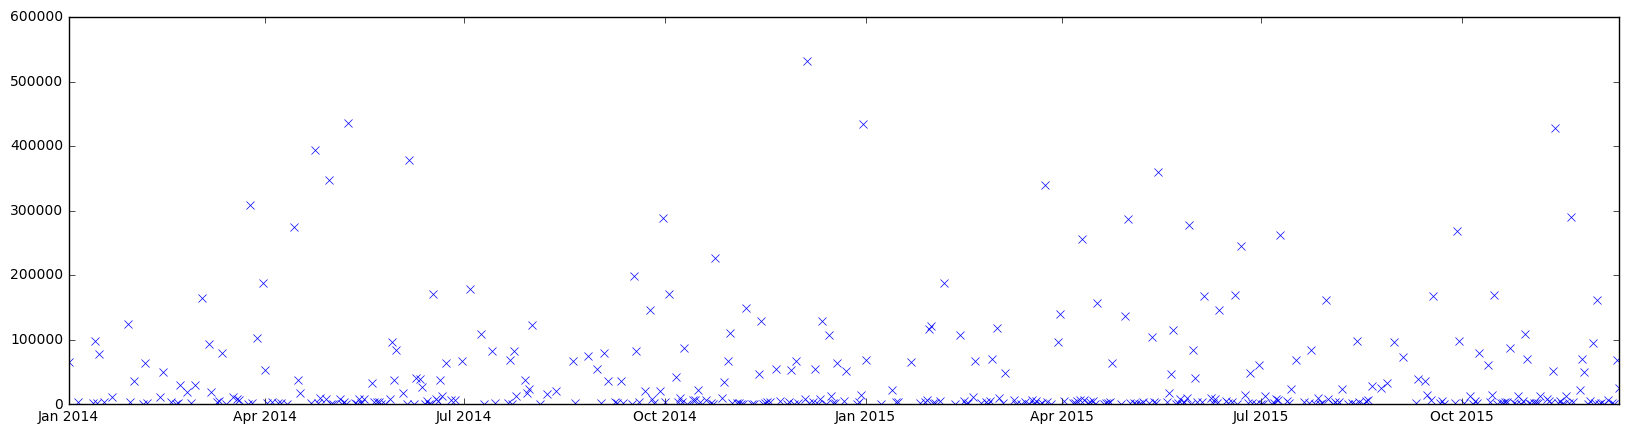

In [101]:
plt.figure(figsize=(20,5))

data1 = number_by_date['2014-01-01':'2015-12-12']
data2 = amount_by_date['2014-01-01':'2015-12-12']
print(type(data1))
dates = data1["SIZE"]
# print(dates)
plt.plot(data1, 'o')
plt.show()
plt.figure(figsize=(20,5))
plt.plot(data2, 'x')
plt.show()

In [ ]:
# Filter this:
# By party
# By individual/corporation

# How can we find "events"


In [ ]:
# Other unsupervised learning techniques that aren't clusters


Can we consider each name a seperate datapoint (groupby "NAME"), and then cluster them based on each's collection of timestamps?



In [159]:
## df_by_name = contributions.groupby("CONTRIBUTOR_NAME")
size = df_by_name.size()
avg = df_by_name.mean()
# print(avg)
size_avg = pd.DataFrame(size, columns=['size']).join(avg)
# print(size_avg)
# more than 5 donations
size = size[(size > 5) & (size < 80)]
# n, bins, patches = plt.hist(size, 20, facecolor='green', alpha=0.75)
# ax = plt.gca()                     
# ax.set_yscale('log')
# ax.set_yticks([1,2,3,4,5,10,20,30,40,50,100,500])
# ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

# plt.grid()
# plt.ylabel('# Entities')
# plt.xlabel('Total # donations made over period')
# plt.show()

from pandas.tools.plotting import scatter_matrix
# size_avg = size_avg[['AMOUNT', 'size']]
# # print(size_avg)
# # scatters = scatter_matrix(size_avg, alpha=0.2, figsize=(6, 6))
# size_avg.plot(kind='scatter', x='size', y='AMOUNT', alpha=0.1);
# axes = plt.gca()
# axes.set_xlim([0,80])
# axes.set_ylim([500,40000])
# plt.ylabel('average donation')
# plt.xlabel('number of donations')
# plt.show

print(size_avg.index)

size_avg_no = size_avg[size_avg['size'] > 20]
print(len(size_avg_no))
import plotly.graph_objs as go
# Create a trace
trace = go.Scatter(
    x = size_avg_no['AMOUNT'],
    y = size_avg_no['size'],
    mode = 'markers',
    text = size_avg_no.index,
    opacity = 0.4
)

data = [trace]

layout = go.Layout(
    xaxis=dict(
        range=[500, 50000]
    ),
    yaxis=dict(
        range=[10, 100]
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='axes-range-manual')

# Plot and embed in ipython notebook!
# iplot(data, filename='basic-scatter')


Index([u'0345892 BC LTD', u'0692763 BC LTD', u'0695826 BC LTD DBA WOODHAVEN',
       u'0695827 BC LTD', u'0700100 BC LTD',
       u'0700497 BC LTD BOSTON PIZZA TERRACE', u'0701915 BC LTD',
       u'0702015 BC LTD', u'0702534 BC LTD', u'0704684 BC LTD',
       ...
       u'ZLC FINANCIAL GROUP', u'ZLC FINANCIAL GROUP LTD',
       u'ZLOTNIK FINANCIAL SERVICES', u'ZLOTNIK FINANCIAL SERVICES (1995) LTD',
       u'ZLOTNIK, LAMB & COMPANY', u'ZOO FOOD INC',
       u'ZORKIN INSURANCE BROKERS INC', u'ZUFFA CANADA LLC',
       u'ZULFIKAR SOMANI & HABIBA SOMANI', u'ZZ CHROME MFG INC'],
      dtype='object', name=u'CONTRIBUTOR_NAME', length=15048)
184


We can cluster with the helliger distance, with a discrete probability distribution is defined as 
$$ H(P,Q)={\frac {1}{\sqrt {2}}}\;{\sqrt {\sum _{i=1}^{k}({\sqrt {p_{i}}}-{\sqrt {q_{i}}})^{2}}}, $$
but note if you choose the wrong bucket size, events that are slighty not-synced up will be reported as being distant.

Could: 
1. change the bucket sizes avoid this
2. use limited time-warping


In [42]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

_SQRT2 = np.sqrt(2)     # sqrt(2) with default precision np.float64
def hellinger3(p, q):
    return np.sqrt(np.sum((np.sqrt(p) - np.sqrt(q)) ** 2)) / _SQRT2

# Bucketize data
# create a column for each month
contributions['DATE'] = pd.to_datetime(contributions['DATE'])
contributions_deduped = contributions.groupby(['CONTRIBUTOR_NAME', 'DATE', 'AMOUNT'], as_index=False).sum()
type(contributions_deduped.columns)
contributions_deduped.ix[0]

#https://chrisalbon.com/python/pandas_binning_data.html
# These need to be in ms format
bins = [0, 25, 50, 75, 100]
# These will be in Month/Year format
group_names = ['Low', 'Okay', 'Good', 'Great']

# 
df['categories'] = pd.cut(df['DATE'], bins, labels=group_names)

# could count OR sum/weight in some other way
pd.value_counts(df['categories'])


CONTRIBUTOR_NAME       (RICHARD) GUY BURDIKIN
DATE                      2014-07-31 00:00:00
AMOUNT                                    100
CLASS                                       1
BOUNDARY_SET                              NaN
SA1_CONTRIBUTION_SK                    956714
Unnamed: 12                               NaN
Name: 0, dtype: object